In [1]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import *
from sklearn.metrics import roc_auc_score

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
N=26500

In [3]:
data = pd.read_csv('./Xtrain_challenge_owkin.csv',nrows=N)
data=data.drop('Ids', axis=1)
data=data.values
y = pd.read_csv('./challenge_output_data_training_file_disease_prediction_from_dna_data.csv',nrows=N,sep=';')
y=y.drop('Ids', axis=1)
y=y.values
 ## maybe concatenate the SNPs ?

# Should be paire 2 by 2 ? Careful to onehot

In [4]:
#dataAgg=data.astype('str')
#dataAggOdd=dataAgg[:, 0::2]
#dataAggEven=dataAgg[:, 1::2]
#dataAgg=np.core.defchararray.add(dataAggOdd,dataAggEven)
#dataAgg=dataAgg.astype(np.uint8)


In [5]:
#my_dict = {1:1, 0:0, 11:3, 10:2}
#dataAgg=np.vectorize(my_dict.get)(dataAgg)

In [6]:
#dataAggHot=(np.arange(dataAgg.max()) == dataAgg[...,None]-1).astype(int)

In [7]:
#dataAggHot=np.reshape(np.ravel(dataAggHot), (N, 54372))

In [8]:
#meanH=dataAggHot.mean()
#stdH=dataAggHot.std()
#dataAggHot=(dataAggHot-meanH)/stdH
#x_trainH, x_testH, y_trainH, y_testH = train_test_split(dataAggHot,y.ravel(),test_size=0.2,train_size=0.8,random_state=777)
#print("Size of training set = "+str(len(x_trainH)))
#print("Size of test set = "+str(len(x_testH)))

# Nope ?

In [9]:
mean=data.mean()
std=data.std()
data=(data-mean)/std
x_train, x_test, y_train, y_test = train_test_split(data,y.ravel(),test_size=0.2,train_size=0.8,random_state=777)
print("Size of training set = "+str(len(x_train)))
print("Size of test set = "+str(len(x_test)))

Size of training set = 21200
Size of test set = 5300


In [10]:
w=36248

In [11]:
#svm_rbf = svm.SVC(kernel='rbf', C=1e3, gamma=0.1)
#svm_lin = svm.SVC(kernel='linear', C=1e3)
#svm_poly = svm.SVC(kernel='poly', C=1e3, degree=2)
#y_rbf = svm_rbf.fit(x_train, y_train).predict(x_test)
#y_lin = svm_lin.fit(x_train, y_train).predict(x_test)
#y_poly = svm_poly.fit(x_train, y_train).predict(x_test)

In [12]:
#print(roc_auc_score(y_test,y_rbf))
#print(roc_auc_score(y_test,y_lin))
#print(roc_auc_score(y_test,y_poly))

In [13]:
#print(accuracy_score(y_test,y_rbf))
#print(accuracy_score(y_test,y_lin))
#print(accuracy_score(y_test,y_poly))

In [14]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-1,1e-2,1e-3, 1,10],
                     'C': [1e-3,1e-2,1e-1,1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1e-3,1e-2,1e-1,1, 10, 100, 900,1000,1100,1200]}]


#clf = GridSearchCV(svm.SVC(C=1), tuned_parameters, cv=5)
#clf.fit(x_train, y_train.ravel())
#print(clf.best_params_)
#y_true, y_pred = y_test, clf.predict(x_test)
#print(accuracy_score(y_true,y_pred))

# Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
# use a full grid over all parameters
clf = RandomForestClassifier(n_estimators=200)
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 5,10,20],
              "min_samples_leaf": [1, 3, 5,10,20],
              "bootstrap": [True],
              "criterion": ["gini"]}
#grid_search = GridSearchCV(clf, param_grid=param_grid)
#grid_search.fit(x_train, y_train.ravel())
#print(grid_search.best_params_)
#y_true, y_pred = y_test, grid_search.predict(x_test)
#print(accuracy_score(y_true,y_pred))

# One H data

In [17]:
# use a full grid over all parameters
clf = RandomForestClassifier(n_estimators=200)
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 5,10,20],
              "min_samples_leaf": [1, 3, 5,10,20],
              "bootstrap": [True],
              "criterion": ["gini"]}
#grid_search = GridSearchCV(clf, param_grid=param_grid)
#grid_search.fit(x_trainH, y_train.ravel())
#print(grid_search.best_params_)
#y_true, y_pred = y_test, grid_search.predict(x_testH)
#print(accuracy_score(y_true,y_pred))

In [18]:
#svm_rbf = svm.SVC(kernel='rbf', C=1e3, gamma=0.1)
#svm_lin = svm.SVC(kernel='linear', C=1e3)
#svm_poly = svm.SVC(kernel='poly', C=1e3, degree=2)
#y_rbf = svm_rbf.fit(x_trainH, y_train).predict(x_testH)
#y_lin = svm_lin.fit(x_trainH, y_train).predict(x_testH)
#y_poly = svm_poly.fit(x_trainH, y_train).predict(x_testH)

In [19]:
#print(accuracy_score(y_test,y_rbf))
#print(accuracy_score(y_test,y_lin))
#print(accuracy_score(y_test,y_poly))

In [20]:
#tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-1,1e-2,1e-3, 1,10],
#                     'C': [1e-3,1e-2,1e-1,1, 10, 100, 1000]},
#                    {'kernel': ['linear'], 'C': [1e-3,1e-2,1e-1,1, 10, 100, 900,1000,1100,1200]}]#


#clf = GridSearchCV(svm.SVC(C=1), tuned_parameters, cv=5)
#clf.fit(x_trainH, y_train.ravel())
#print(clf.best_params_)
#y_true, y_pred = y_test, clf.predict(x_testH)
#print(accuracy_score(y_true,y_pred))

# Deep ?

In [21]:
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten, Dropout, Merge
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.optimizers import Adam

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [46]:
def ConvNet( width,  trainable=False):
    
 
    
    sequence_input = Input(shape=(width,1), dtype="float32", name="Input")
    
 #   l_conv0 = Conv1D(filters=64, kernel_size=5, activation='relu')(sequence_input)
  #  l_pool0 = MaxPooling1D(pool_size=3)(l_conv0)
    
    convs = []
    filter_sizes = [3, 4, 5]
    
    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=64, kernel_size=filter_size, activation='relu',activity_regularizer=regularizers.l1(0.000001))(sequence_input)
        l_pool = MaxPooling1D(pool_size=3)(l_conv)
        convs.append(l_pool)
    
    l_merge = Merge(mode='concat', concat_axis=1, name="Merge")(convs)
    
    l_conv1 = Conv1D(filters=32, kernel_size=5, activation='relu')(l_merge)

    
    l_drop  = Dropout(0.5)(l_conv1)
    
    
    
    convs = []# ?
    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=64, kernel_size=filter_size, activation='relu')(l_drop)
        l_pool = MaxPooling1D(pool_size=3)(l_conv)
        convs.append(l_pool)
    
    l_merge2 = Merge(mode='concat', concat_axis=1, name="Merge")(convs)
    
    l_conv2 = Conv1D(filters=64, kernel_size=5, activation='relu')(l_merge)
    l_pool2 = MaxPooling1D(pool_size=10)(l_conv1)
    
    l_drop2  = Dropout(0.5)(l_pool2)
    
    l_flat2  = Flatten(name="Flatten")(l_drop2)
    
    l_dense = Dense(100, activation='relu', name="Dense")(l_flat2)
    
    
    preds = Dense(2, activation='softmax', name="Output")(l_dense)
    
    model = Model(sequence_input, preds)
    
    return model

In [47]:
x_train_t, x_val, y_train_t, y_val = train_test_split(x_train,y_train.ravel(),test_size=0.2,train_size=0.8,random_state=777)

t,_=x_train_t.shape

x_train_t=np.reshape(x_train_t,(t, 36248,1))
y_train_t=np.reshape(y_train_t,(t, 1))

t,_=x_val.shape
x_val=np.reshape(x_val,(t, 36248,1))
y_val=np.reshape(y_val,(t, 1))

In [48]:
from keras import regularizers

In [49]:
model = ConvNet(
                w, \
                trainable=False)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:18: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:33: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.


In [50]:

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              (None, 36248, 1)     0                                            
__________________________________________________________________________________________________
conv1d_17 (Conv1D)              (None, 36246, 64)    256         Input[0][0]                      
__________________________________________________________________________________________________
conv1d_18 (Conv1D)              (None, 36245, 64)    320         Input[0][0]                      
__________________________________________________________________________________________________
conv1d_19 (Conv1D)              (None, 36244, 64)    384         Input[0][0]                      
__________________________________________________________________________________________________
max_poolin

In [51]:
from keras.callbacks import ModelCheckpoint

In [52]:

## Create checkpoint that saves the weights each time validation set at each epoch is outperformed by the last one## Creat 
filepath="weights_bestsspenalty.hdf5"
checkpoint = ModelCheckpoint(filepath, \
                             monitor="val_acc", \
                             verbose=1, \
                             save_best_only=True, \
                             mode="max")
callbacks_list = [checkpoint]

In [53]:
#history = conv.fit(x_train_t, y_train_t, \
#                    validation_data=(x_val, y_val), \
#                    epochs=100, \
#                    batch_size=2, \
#                    callbacks=callbacks_list, \
#                    verbose=1)

In [54]:
from keras.utils.np_utils import to_categorical

y_train_t2 = to_categorical(y_train_t, num_classes=2)
y_val2 = to_categorical(y_val, num_classes=2)

In [55]:

model.compile(loss='binary_crossentropy', \
              optimizer=Adam(lr=1e-4), \
              metrics=['acc'])

In [56]:
history = model.fit(x_train_t, y_train_t2, \
                    validation_data=(x_val, y_val2), \
                    epochs=30, \
                    batch_size=6, \
                    callbacks=callbacks_list, \
                    verbose=1)

Train on 16960 samples, validate on 4240 samples
Epoch 1/30
16960/16960 [==============================] - 1060s 62ms/step - loss: 1.1044 - acc: 0.5604 - val_loss: 0.6834 - val_acc: 0.5717

Epoch 00001: val_acc improved from -inf to 0.57170, saving model to weights_bestsspenalty.hdf5
Epoch 2/30
16960/16960 [==============================] - 1056s 62ms/step - loss: 0.6764 - acc: 0.5818 - val_loss: 0.6535 - val_acc: 0.6564

Epoch 00002: val_acc improved from 0.57170 to 0.65637, saving model to weights_bestsspenalty.hdf5
Epoch 3/30
16960/16960 [==============================] - 1054s 62ms/step - loss: 0.6263 - acc: 0.6613 - val_loss: 0.6181 - val_acc: 0.6625

Epoch 00003: val_acc improved from 0.65637 to 0.66250, saving model to weights_bestsspenalty.hdf5
Epoch 4/30
16960/16960 [==============================] - 1053s 62ms/step - loss: 0.5936 - acc: 0.6905 - val_loss: 0.6010 - val_acc: 0.6774

Epoch 00004: val_acc improved from 0.66250 to 0.67736, saving model to weights_bestsspenalty.hdf

In [57]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [58]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

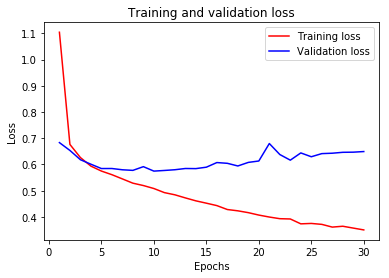

In [60]:

history_dicthistory_  = history.history
train_loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

num_epochs = 30
epochs = range(1, num_epochs + 1)

plt.plot(epochs, train_loss_values, 'r', label="Training loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

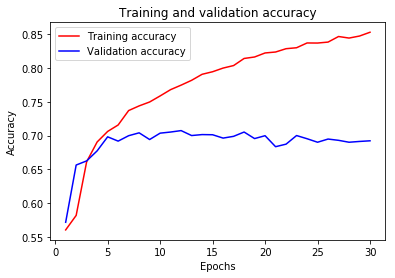

In [61]:

history_dicthistory_  = history.history
train_acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

num_epochs = 30
epochs = range(1, num_epochs + 1)

plt.plot(epochs, train_acc_values, 'r', label="Training accuracy")
plt.plot(epochs, val_acc_values, 'b', label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [62]:
t,_=x_test.shape
x_test_t=np.reshape(x_test,(t, 36248,1))

In [63]:
y_pred=model.predict(x_test_t, verbose=1)

5300/5300 [==============================] - 84s 16ms/step


In [64]:
y_pred

array([[0.01765549, 0.9823445 ],
       [0.9586984 , 0.04130162],
       [0.8433937 , 0.15660629],
       ...,
       [0.9872556 , 0.01274437],
       [0.99301505, 0.00698495],
       [0.5542225 , 0.4457775 ]], dtype=float32)

In [65]:
labels_01 = (y_pred[:,0] < 0.5).astype(np.int)

In [66]:
print(roc_auc_score(labels_01,y_test))

0.6938645252771206


In [72]:

datat_tempdatat_te  = pd.read_csv('./Xtest_challenge_owkin.csv')
datat=datat_tempdatat_te.drop('Ids', axis=1)
datat=datat.values
datat=(datat-mean)/std
t,_=datat.shape
x_test_no_answer=np.reshape(datat,(t, 36248,1))

In [73]:
y_pred=model.predict(x_test_no_answer, verbose=1)

13250/13250 [==============================] - 193s 15ms/step


In [74]:
np.savetxt('predConvL1penalty',y_pred)